# **Sentiment Analysis of Amazon_Product_data**

In [1]:
# Import the required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#Import the dataset
df = pd.read_csv('/content/Amazon_Product_data.csv')

In [6]:
#Top entries of dataset
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [7]:
# Last entries of dataset
df.tail()

,Review,Sentiment
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5
24999,Awsome!!! I loved this little speaker. It has ...,5


In [9]:
# To find the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [10]:
# To describe the dataset
df.describe()

,Sentiment
count,24999.000000
mean,2.999920
std,1.414214
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [11]:
# To check the null value of dataset
df.isnull().sum()

,0
Review,0
Sentiment,0


In [12]:
# To check the Columns From datset
df.columns

Index(['Review', 'Sentiment'], dtype='object')

In [8]:
#Drop the null values
df.dropna(inplace=True)

In [13]:
# Sentiment value change into 0 and 1
#1,2,3->negative(i.e 0)
df.loc[df['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
df.loc[df['Sentiment']>3,'Sentiment'] = 1

This is a common preprocessing step in machine learning and sentiment analysis to convert a multi-class sentiment rating into a binary classification (negative vs. positive)

In [16]:
# Remove the stopwords frim dataset.
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview

df['Review']=df['Review'].apply(clean_review)

In [15]:
#Top entries of dataset after some Preprocessing
df.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [ ]:
# value counts
df['Sentiment'].value_counts()

,count
Sentiment,
0,15000
1,9999


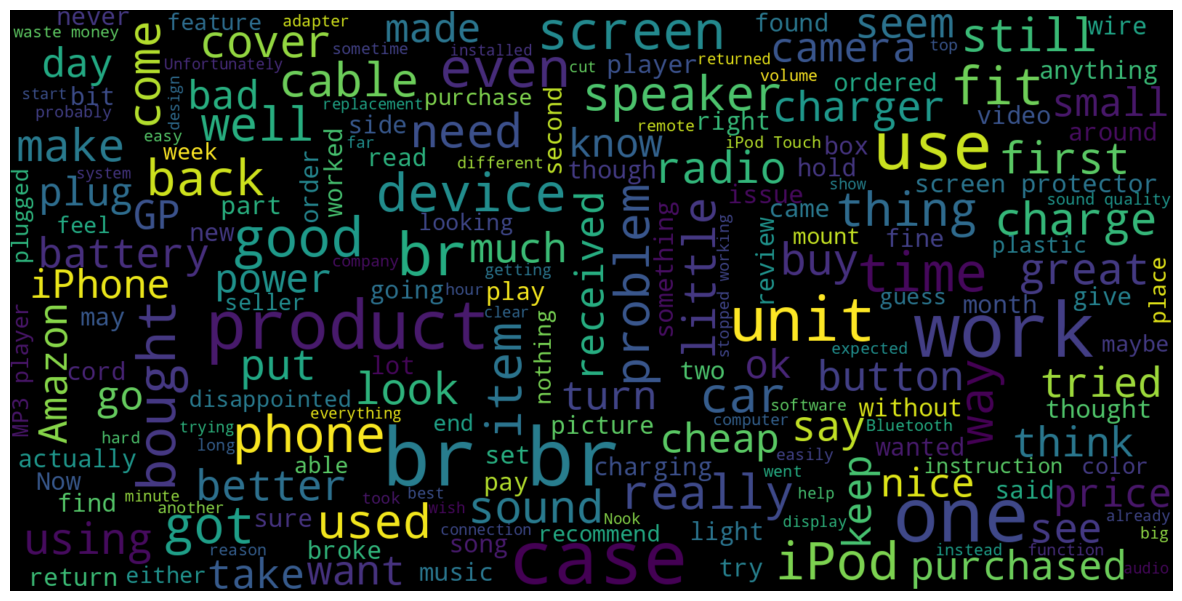

In [ ]:
# Visualizes the most common words in negative sentiment reviews
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Purpose of This Code

1. Visualizes the most common words in negative sentiment reviews.
2. Helps in sentiment analysis to understand recurring negative themes.
Useful for insight extraction, e.g., if words like "bad", "slow", "worst" dominate, it indicates common complaints.


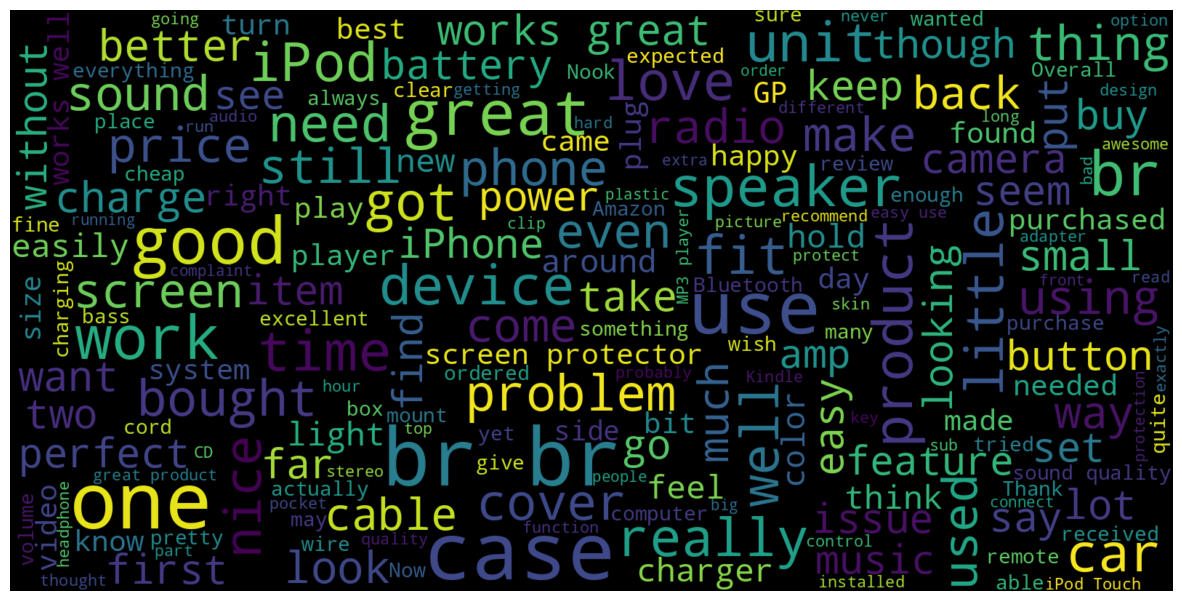

In [ ]:
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# text vectorization using TF-IDF (Term Frequency-Inverse Document Frequency)
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['Review'] ).toarray()

This code is performing text vectorization using TF-IDF (Term Frequency-Inverse Document Frequency) to convert text reviews into numerical features for machine learning.

# Why Use This?

1. Converts text data into numerical form for machine learning models.
2. Helps classify text into categories (e.g., sentiment analysis).
Reduces the impact of common words like "and", "the", "is" (similar to removing stopwords)

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,df['Sentiment'],test_size=0.25 ,random_state=42)

In [ ]:
# Import the LogisticRegression model from liner_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

0.816


Find the accuracy of LogisticRegression Model

# The accuracy of LogisticRegression Model is 0.816